# Cleaning, Automating, and making things EASY for Future Self

# http://pad.software-carpentry.org/2018-01-11-ucmerced for details

In [1]:
%pwd


'/Users/JackieShay/Documents/jupyter_notebook_jes/data'

In [10]:
import pandas as pd

In [30]:
import numpy as np 

In [ ]:
VERBOSE = True #this is setting VERBOSE to Yes

In [20]:
cleaned_data_location = '../data/processed_data/gapminder_cleaned.csv'
try:
    df = pd.read_csv(cleaned_data_location)
    if VERBOSE:
       print(df.head())
except FileNotFound:
    print("Could not open file. Wrong path? You tried. :)", cleaned_data_location)

   year       pop  lifeexp   gdppercap      country continent
0  1952   8425333   28.801  779.445314  afghanistan      asia
1  1957   9240934   30.332  820.853030  afghanistan      asia
2  1962  10267083   31.997  853.100710  afghanistan      asia
3  1967  11537966   34.020  836.197138  afghanistan      asia
4  1972  13079460   36.088  739.981106  afghanistan      asia


In [15]:
df.tail()

,year,pop,lifeexp,gdppercap,country,continent
1699,1987,9216418,62.351,706.157306,zimbabwe,africa
1700,1992,10704340,60.377,693.420786,zimbabwe,africa
1701,1997,11404948,46.809,792.449960,zimbabwe,africa
1702,2002,11926563,39.989,672.038623,zimbabwe,africa
1703,2007,12311143,43.487,469.709298,zimbabwe,africa


In [23]:
years = df['year'].unique()

In [25]:
# Adding defenisive assertion programming statements can protect you in the future.
# Good for testing your code
# Check in with your own assumptions to make sure the things you know is what the program knows. 
years.sort()
years
assert min(years) == 1952
assert max(years) == 2007

# What is the mean life expenctancy in Asia through time? 

In [33]:
# Start with 1952
# Narrow down our data to Asia

mask_asia = df['continent']=='asia'
df_asia = df[mask_asia]

mask_1952 = df_asia['year'] == 1952
df_1952 = df_asia[mask_1952]

value = np.mean(df_1952['lifeexp'])
value


46.314393939393945

# How could we use variables to make it easier to re-run this across continents?

In [36]:
VERBOSE = 0

mask_asia = df['continent']=="asia"
df_asia = df[mask_asia]

years = df_asia['year'].unique()

summary = []

for year in years:
    if VERBOSE:
        print(year)
    mask_year = df_asia['year'] == year
    df_year = df_asia[mask_year]
    value = np.mean(df_year['lifeexp'])
    summary.append(('asia', year, value))
    
summary = pd.DataFrame(summary, columns=['Continent', 'Year', 'LifeExp'])

1952
1957
1962
1967
1972
1977
1982
1987
1992
1997
2002
2007


In [37]:
years

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [38]:
summary

,Continent,Year,LifeExp
0,asia,1952,46.314394
1,asia,1957,49.318544
2,asia,1962,51.563223
3,asia,1967,54.663640
4,asia,1972,57.319269
5,asia,1977,59.610556
6,asia,1982,62.617939
7,asia,1987,64.851182
8,asia,1992,66.537212
9,asia,1997,68.020515


In [40]:
# What is a mask?
# A mask asigns a value to show whether or not an 

mask_asia

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1674     True
1675     True
1676     True
1677     True
1678     True
1679     True
1680    False
1681    False
1682    False
1683    False
1684    False
1685    False
1686    False
1687    False
1688    False
1689    False
1690    False
1691    False
1692    False
1693    False
1694    False
1695    False
1696    False
1697    False
1698    False
1699    False
1700    False
1701    False
1702    False
1703    False
Name: continent, Length: 1704, dtype: bool

In [42]:
VERBOSE = 0
mask_continent = df['continent']=="continent"
df_continent = df[mask_continent]

years = df_continent['year'].unique()

summary = []

for year in years:
    if VERBOSE:
        print(year)
    mask_year = df_continent['year'] == year
    df_year = df_continent[mask_year]
    value = np.mean(df_year['lifeexp'])
    summary.append(('continent', year, value))
    
summary = pd.DataFrame(summary, columns=['Continent', 'Year', 'LifeExp'])

In [43]:
mask_continent

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1674    False
1675    False
1676    False
1677    False
1678    False
1679    False
1680    False
1681    False
1682    False
1683    False
1684    False
1685    False
1686    False
1687    False
1688    False
1689    False
1690    False
1691    False
1692    False
1693    False
1694    False
1695    False
1696    False
1697    False
1698    False
1699    False
1700    False
1701    False
1702    False
1703    False
Name: continent, Length: 1704, dtype: bool

In [57]:
VERBOSE = 1
summary = []

last_value = 0
for continent in df['continent'].unique():
    if VERBOSE:
            print(continent)
    mask_continent = df['continent']==continent
    df_continent  = df[mask_continent]
    for year in df_continent['year'].unique():
        if VERBOSE:
            print(year)
        mask_year = df_continent['year'] == year
        df_year = df_continent[mask_year]
        value = np.mean(df_year['lifeexp'])
        assert value != last_value
        last_value = value
        summary.append((continent, year, value))

    
summary = pd.DataFrame(summary, columns=['Continent', 'Year', 'LifeExp'])

asia
1952
1957
1962
1967
1972
1977
1982
1987
1992
1997
2002
2007
europe
1952
1957
1962
1967
1972
1977
1982
1987
1992
1997
2002
2007
africa
1952
1957
1962
1967
1972
1977
1982
1987
1992
1997
2002
2007
americas
1952
1957
1962
1967
1972
1977
1982
1987
1992
1997
2002
2007
oceania
1952
1957
1962
1967
1972
1977
1982
1987
1992
1997
2002
2007


In [56]:
summary.groupby('Continent').mean()

,Year,LifeExp
Continent,,
africa,1979.5,48.865330
americas,1979.5,64.658737
asia,1979.5,60.064903
europe,1979.5,71.903686
oceania,1979.5,74.326208


In [60]:
def add_two(input_num):
    return input_num + 2

In [62]:
add_two(3)

5

In [63]:
def add_two(input_num):
    b = input_num + 2
    return b

In [64]:
add_two(3)

5

In [86]:
# Write a function to calculate mean value per year per continent for each category. 
def calculate_mean_over_time(data, category, continent):
    # Create a mask that selects the continent of choice 
    mask_continent = data['continent'] == continent # requires that data frame has a column named continent 
    data_continent = data[mask_continent]
    
    #Loop through years calculate the mean
    years = data_continent['year'].unique()
    summary = []
    for year in years:
        mask_year = data_continent['year'] == year
        data_year = data_continent[mask_year]
        value = np.mean(data_year[category])
        summary.append((continent, year, value))
        
    summary = pd.DataFrame(summary, columns = ['continent', 'year', category])
    return summary
    


In [77]:
calculate_mean_median_over_time

<function __main__.calculate_mean_median_over_time>

In [68]:
help(calculate_mean_over_time)

Help on function calculate_mean_over_time in module __main__:

calculate_mean_over_time(data, category, continent)



In [87]:
calculate_mean_over_time(df, 'pop', 'europe')

,continent,year,pop
0,europe,1952,1.393736e+07
1,europe,1957,1.459635e+07
2,europe,1962,1.534517e+07
3,europe,1967,1.603930e+07
4,europe,1972,1.668784e+07
5,europe,1977,1.723882e+07
6,europe,1982,1.770890e+07
7,europe,1987,1.810314e+07
8,europe,1992,1.860476e+07
9,europe,1997,1.896480e+07


# How would you make a function to calculate the median over time?
## HINT don't forget about DRY. 
## np.median calculate medians 

In [88]:
# Write a function to calculate mean and median value per year per continent for each category. 
def calculate_mean_median_over_time(data, category, continent):
    # Create a mask that selects the continent of choice 
    mask_continent = data['continent'] == continent # requires that data frame has a column named continent 
    data_continent = data[mask_continent]
    
    #Loop through years calculate the mean
    years = data_continent['year'].unique()
    summary = []
    for year in years:
        mask_year = data_continent['year'] == year
        data_year = data_continent[mask_year]
        mean = np.mean(data_year[category])
        median = np.median(data_year[category])
        summary.append((continent, year, mean, median))
        
    summary = pd.DataFrame(summary, columns = ['continent', 'year', 'median', 'mean'])
    return summary
    

In [89]:
calculate_mean_median_over_time(df, 'pop', 'europe')

,continent,year,median,mean
0,europe,1952,1.393736e+07,7199786.5
1,europe,1957,1.459635e+07,7507528.0
2,europe,1962,1.534517e+07,7814503.0
3,europe,1967,1.603930e+07,8140724.0
4,europe,1972,1.668784e+07,8444744.0
5,europe,1977,1.723882e+07,8741694.5
6,europe,1982,1.770890e+07,8962461.0
7,europe,1987,1.810314e+07,9101370.5
8,europe,1992,1.860476e+07,9272632.0
9,europe,1997,1.896480e+07,9527017.0


# Calculate Statistic Over Time

In [112]:
def calculate_statistic_over_time(data, category, continent, func):
    
    """
        Args: 
            data: a pandas data frame that includes a column heading 'continent' and year
            category: a string that is one of the column headings in data
            continent: a string that is one of the values in the continent column
            func: a string with the possible values 'mean' and 'median' (e.g. np.mean)
        
        Returns:
            a pandas data frame with a headings continent, year, category 
    """
    
    # Check your input values 
    assert 'continent' in data.column.values
    assert continent in data['continent'].unique() # Asserts if value is present or not
    
    # Create a mask that selects the continent of choice     
    mask_continent = data['continent'] == continent # requires that data frame has a column named continent 
    data_continent = data[mask_continent]
    
    #Loop through years calculate the mean
    years = data_continent['year'].unique()
    summary = []
    for year in years:
        mask_year = data_continent['year'] == year
        data_year = data_continent[mask_year]
        mean = np.mean(data_year[category])
        median = np.median(data_year[category])
        summary.append((continent, year, mean, median))
        
    summary = pd.DataFrame(summary, columns = ['continent', 'year', 'median', 'mean'])
    return summary

In [113]:
import pylab as plt
import matplotlib
%matplotlib inline

In [117]:
# Use this function to plot mean life expentency over time across continents 
#continents = df['continent'].unique()
#flg, ax = plt.subplots()
#for continent in continents:
 #   output = calculate_statistic_over_time(df, 'lifeexp', continent, np.median)
  #  output.plot.line('year', 'lifeexp', ax=ax, label=continent)

In [115]:
def calculate_statistic_over_time(data, category, continent, func):
    """Calculate values of a statistic through time
    
    Args:
       data: a pandas data frame that inculdes a colum heading 'continent' and 'year'
       category: a string that is one of the column heaings in data
       continent: a string that is one of the values in the continent column
       func: a function that can operate on a list of numbers (e.g. np.mean)
 
    Returns:
       a pandas dataframe with headings continent, year, category
    """
    # check inputs
    assert 'continent' in data.columns.values
    assert continent in data['continent'].unique()
    
    # Create a mask that selects the continent of choice

    mask_continent = data['continent'] == continent
    data_continent = data[mask_continent]

    # Loop through years and calculate the statistic of interest
    years = data_continent['year'].unique()
    summary = []
    for year in years:
        mask_year = data_continent['year'] == year
        data_year = data_continent[mask_year]
        value = func(data_year[category])
        summary.append((continent, year, value))

    # Turn the summary into a dataframe so that we can visualize easily
    summary = pd.DataFrame(summary, columns=['continent', 'year', category])
    return summary

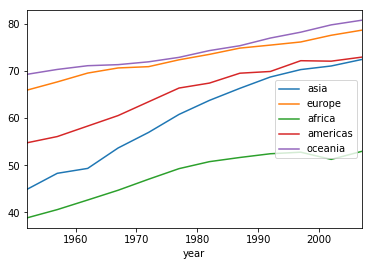

In [116]:
# Use this function to plot mean life expentency over time across continents 
continents = df['continent'].unique()
flg, ax = plt.subplots()
for continent in continents:
    output = calculate_statistic_over_time(df, 'lifeexp', continent, np.median)
    output.plot.line('year', 'lifeexp', ax=ax, label=continent)